Imprimindo a tabela dos microdados de 2023 ( Visualização inicial )

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

tabela = pd.read_csv('microdadosedbasica2023.csv', encoding='ISO-8859-1',sep=";", engine='python') #nrows=100

tabela.head()

,NU_ANO_CENSO,NO_REGIAO,CO_REGIAO,NO_UF,SG_UF,CO_UF,NO_MUNICIPIO,CO_MUNICIPIO,NO_REGIAO_GEOG_INTERM,CO_REGIAO_GEOG_INTERM,...,QT_TUR_BAS_D,QT_TUR_BAS_N,QT_TUR_BAS_EAD,QT_TUR_INF_INT,QT_TUR_INF_CRE_INT,QT_TUR_INF_PRE_INT,QT_TUR_FUND_INT,QT_TUR_FUND_AI_INT,QT_TUR_FUND_AF_INT,QT_TUR_MED_INT
0,2023,Norte,1,Rondônia,RO,11,Porto Velho,1100205,Porto Velho,1101,...,14.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,2023,Norte,1,Rondônia,RO,11,Porto Velho,1100205,Porto Velho,1101,...,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2023,Norte,1,Rondônia,RO,11,Porto Velho,1100205,Porto Velho,1101,...,38.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,Norte,1,Rondônia,RO,11,Porto Velho,1100205,Porto Velho,1101,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2023,Norte,1,Rondônia,RO,11,Porto Velho,1100205,Porto Velho,1101,...,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Universo da aplicação: levantamento de dados estatístico-educacionais de âmbito nacional realizado todos os anos e coordenado pelo Inep. Ele é feito com a colaboração das secretarias estaduais e municipais de Educação e com a participação de todas as escolas públicas e privadas do país. Utilizamos os microdados do ano passado…
- Microdados do Censo Escolar da Educação Básica 2023

Hipótese: Institutos Educacionais na região Norte/Nordeste tendêm a possuir menos recursos e equipamentos para a qualidade de ensino, devido aos percentuais de pobreza nessa região de acordo com outras pesquisas.


Criando os gráficos para análise e apresentação:

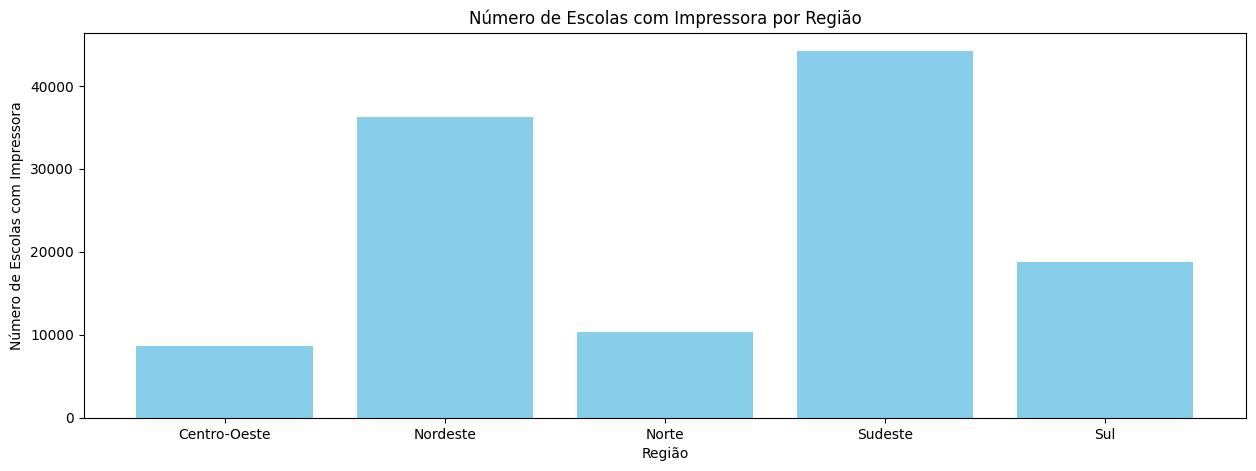

In [92]:
contagem_impressoras = tabela[tabela['IN_EQUIP_IMPRESSORA'] == 1].groupby('NO_REGIAO').size()


plt.figure(figsize=(15,5))


plt.bar(contagem_impressoras.index, contagem_impressoras.values, color='skyblue')


plt.title('Número de Escolas com Impressora por Região')
plt.xlabel('Região')
plt.ylabel('Número de Escolas com Impressora')


plt.show()

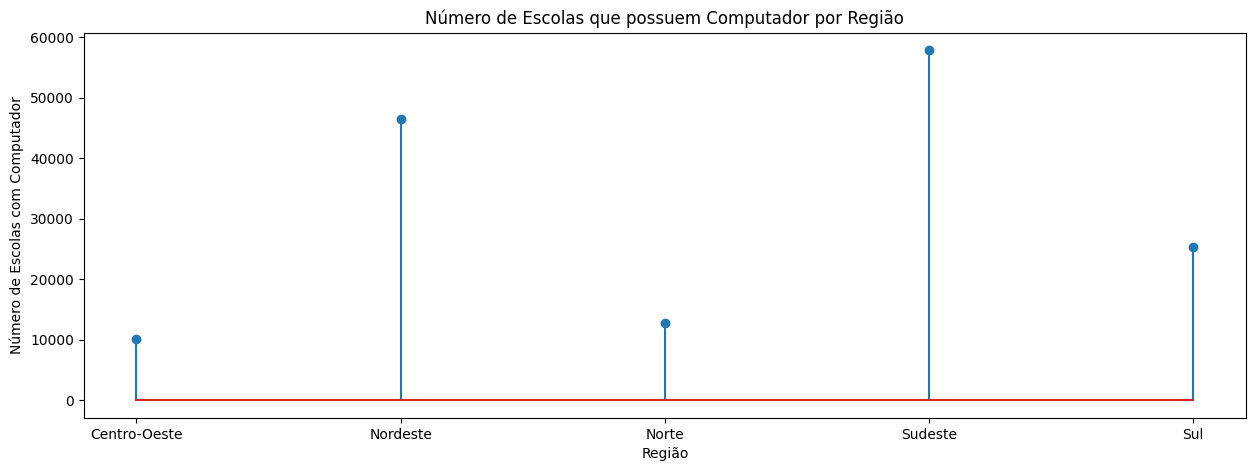

In [5]:
contagem_computadores = tabela[tabela['IN_COMPUTADOR'] == 1].groupby('NO_REGIAO').size()

plt.figure(figsize=(15,5))


plt.stem(contagem_computadores.index, contagem_computadores.values)


plt.title('Número de Escolas que possuem Computador por Região')
plt.xlabel('Região')
plt.ylabel('Número de Escolas com Computador')


plt.show()

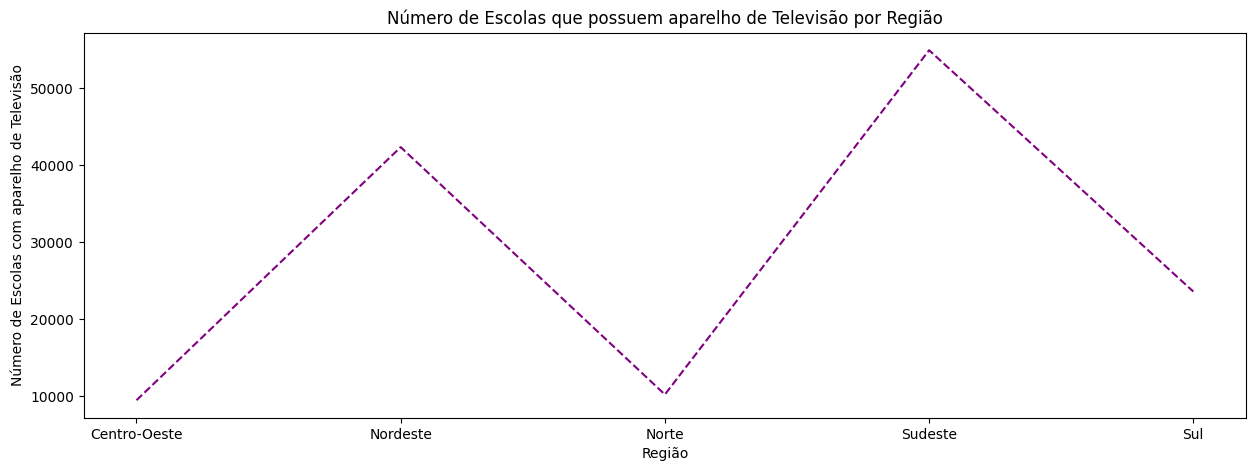

In [94]:
contagem_tvs = tabela[tabela['IN_EQUIP_TV'] == 1].groupby('NO_REGIAO').size()


plt.figure(figsize=(15,5))


plt.plot(contagem_tvs.index, contagem_tvs.values, color='purple', linestyle='--')


plt.title('Número de Escolas que possuem aparelho de Televisão por Região')
plt.xlabel('Região')
plt.ylabel('Número de Escolas com aparelho de Televisão')


plt.show()

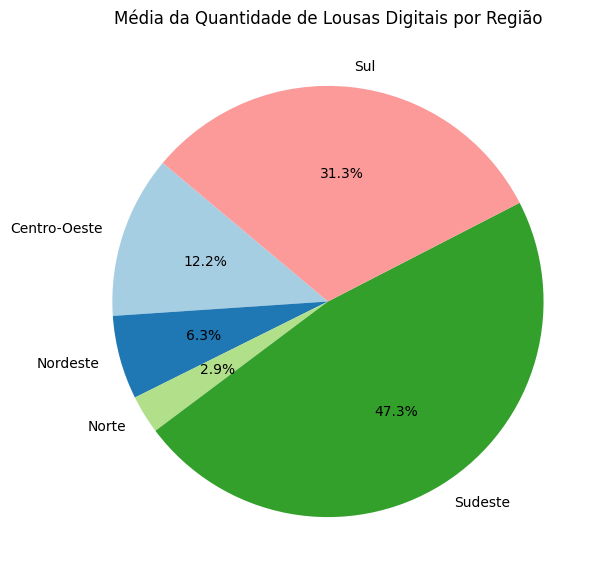

In [95]:
media_lousas_digitais = tabela.groupby('NO_REGIAO')['QT_EQUIP_LOUSA_DIGITAL'].mean()

plt.figure(figsize=(10,7))
plt.pie(media_lousas_digitais, labels=media_lousas_digitais.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
                                                            #adiciona a pct de cada fatia       #adiciona uma paleta de cores para cada regiao

plt.title('Média da Quantidade de Lousas Digitais por Região')

plt.show()


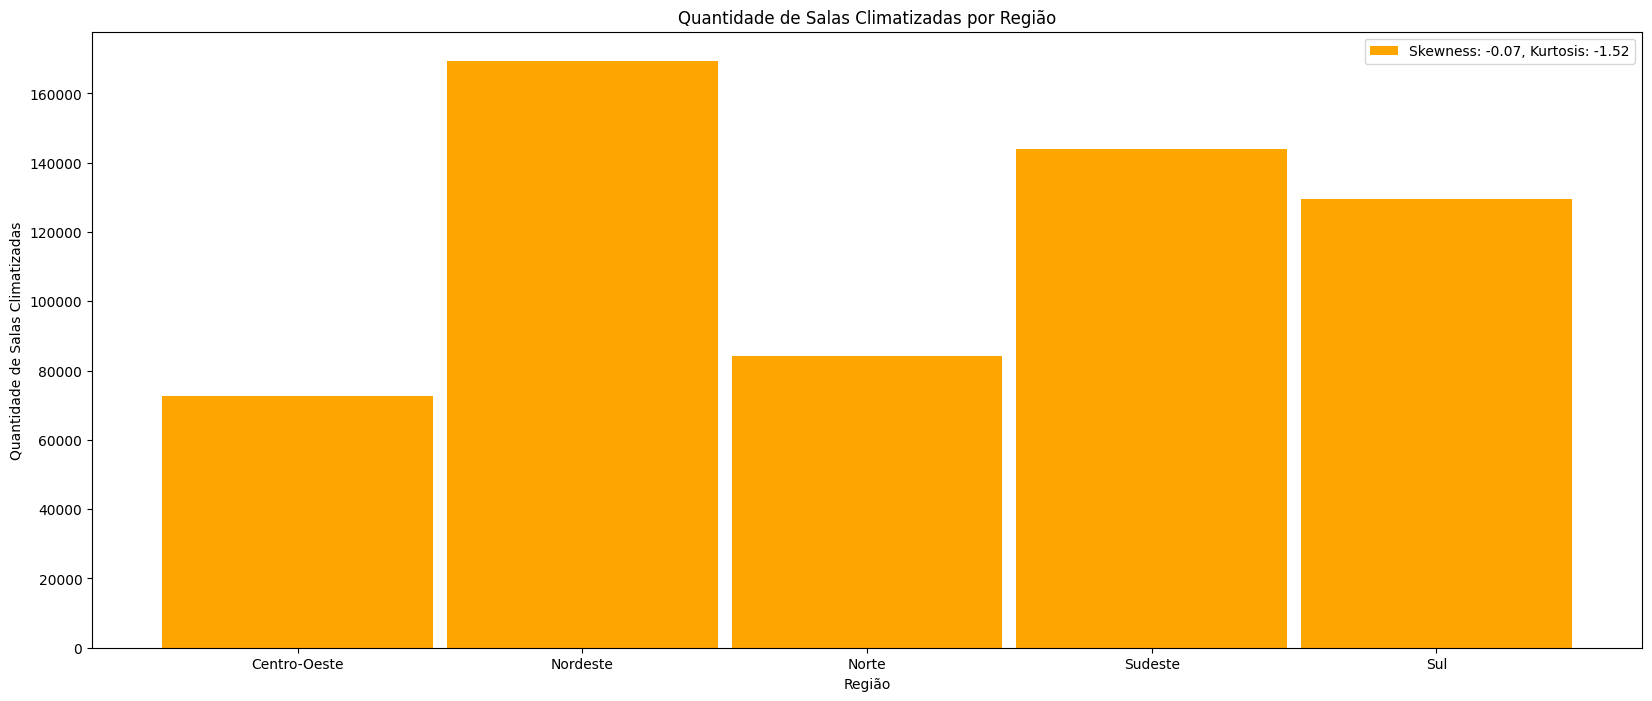

In [32]:
contagem_salas_climatizadas = tabela.groupby('NO_REGIAO')['QT_SALAS_UTILIZA_CLIMATIZADAS'].sum().dropna() #removendo NaN

# Calcular skewness e kurtosis para a quantidade de salas climatizadas por região
skewness_salas = skew(contagem_salas_climatizadas)
kurtosis_salas = kurtosis(contagem_salas_climatizadas)

plt.figure(figsize=(20,8))
plt.bar(contagem_salas_climatizadas.index, contagem_salas_climatizadas.values, color='orange', width=0.95)

plt.title('Quantidade de Salas Climatizadas por Região')
plt.xlabel('Região')
plt.ylabel('Quantidade de Salas Climatizadas')

# legenda para mostrar a Assimetria: Positiva ou Negativa(Skewness) e o Grau: de Achatamento ou Alongamento(Kurtosis)  
plt.legend([f'Skewness: {skewness_salas:.2f}, Kurtosis: {kurtosis_salas:.2f}'], loc='upper right')
plt.show()


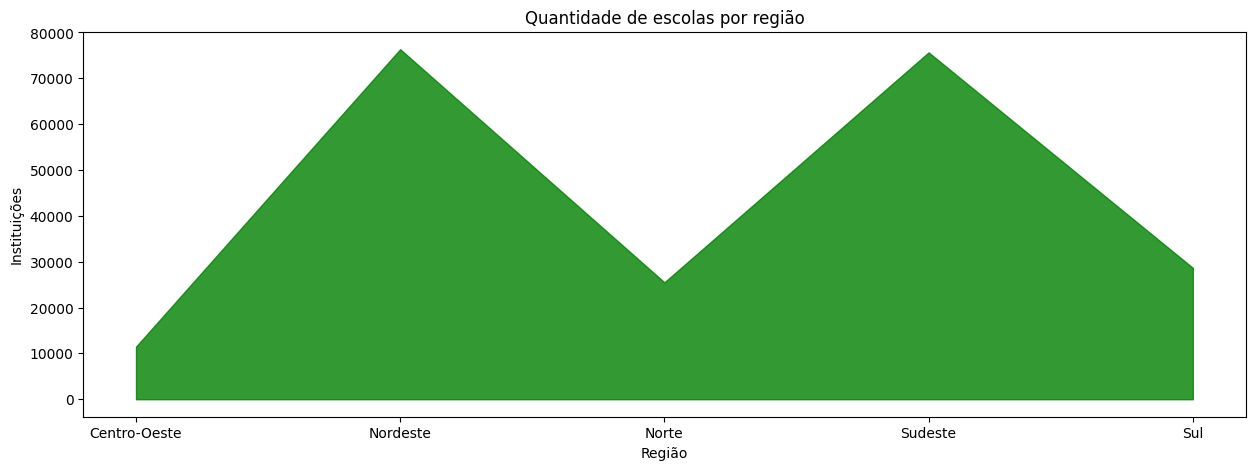

In [34]:
# Quantidade de escolas por região, para analisar se é compatível com a quantidade de equipamentos
#Ex: pode haver muitas escolas em uma região e poucos recursos

cont_regiao = tabela.groupby('NO_REGIAO').size()


plt.figure(figsize=(15,5))


plt.fill_between(cont_regiao.index, cont_regiao.values, color='green', alpha=0.8)


plt.title('Quantidade de escolas por região')
plt.xlabel('Região')
plt.ylabel('Instituições')


plt.show()